<a href="https://colab.research.google.com/github/mobkimark/Darked/blob/master/Cereal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Premier Project For The Hamoye Intern Program. By Monjok,J.T (1).ipynb


80 CEREALS ANALYSIS

Which Cereal Is Healthy For Human Consumption

NAME: MONJOK JOSEPH TEREM TRACK: DATA SCIENCE TYPE: INTERN AT HAMOYE

Project Theme: Food Security And Access-To Prevent Malnutrition.

Project Kick-Off Date:Thursday,19th October,2023.

Project Deadline;Thursday,9th November,2023.

Team:Insight Hub.

Project Description: Our project,"Food Security and Access Analysis In Preventing Malnutrition,"is a comprehensive exploration of the food industry with a focus on cereals.In this Project,We aimed to examine the relationship between the nutritional content of cereals and its implications for food security and access.This EDA(Exploratory Data Analysis) helps address critical questions about the availability,affordability,and nutritional quality of cereals,which are a staple in many households.

Content

---



Fields in the dataset

-Name: name of cereal

-mfr: manufacturer of cereal

A=American Home Food Products G=General Mills K=Kelloggs N=Nabisco P=Post Q=Quaker Oats R=Ralston Purina.

-Type: cold,hot.

-Calories: calories Per Saving

-Protein: grams of protein

-Fat: grams of fat

-Sodium: milligrans of Sodium

-Fiber: grams of fiber

-Carbo: grams of complex carbohydrates

-Sugars: grams of sugars

-Potass: milligrams of Potassium(K)

-Vitamins: Vitamins and Minerals:0,25 or 100,indicating the typical persentage of FDA recommended.

-Shelf: display shelf(1,2 or 3,counting from the floor )

-Weight: weight in ounces of one serving

-Cups: number of cups in one serving

-rating: A rating of the Cereals(possibly from Consumer Reports?)

(https://www.kaggle.com/code/mashhar/data-preprocessing-visualization-model-learning)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [34]:
cereal=pd.read_csv("cereal.csv")

**Understanding Data set**

In [36]:
cereal.shape

(77, 16)

In [37]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [38]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [39]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [40]:
cereal['brand'] = None

cereal['ingredient_sum'] = None

In [41]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'brand', 'ingredient_sum'],
      dtype='object')

In [42]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            77 non-null     object 
 1   mfr             77 non-null     object 
 2   type            77 non-null     object 
 3   calories        77 non-null     int64  
 4   protein         77 non-null     int64  
 5   fat             77 non-null     int64  
 6   sodium          77 non-null     int64  
 7   fiber           77 non-null     float64
 8   carbo           77 non-null     float64
 9   sugars          77 non-null     int64  
 10  potass          77 non-null     int64  
 11  vitamins        77 non-null     int64  
 12  shelf           77 non-null     int64  
 13  weight          77 non-null     float64
 14  cups            77 non-null     float64
 15  rating          77 non-null     float64
 16  brand           0 non-null      object 
 17  ingredient_sum  0 non-null      objec

Creating a Map

In [43]:
manufacturer_mapping={'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs','N':'Nabisco','P':'Post','Q':'Quaker Oats','R':'Ralston Purina'}

In [44]:
cereal['brand'] = cereal['mfr'].map(manufacturer_mapping)

In [45]:
print(cereal['brand'])

0            Nabisco
1        Quaker Oats
2           Kelloggs
3           Kelloggs
4     Ralston Purina
           ...      
72     General Mills
73     General Mills
74    Ralston Purina
75     General Mills
76     General Mills
Name: brand, Length: 77, dtype: object


In [46]:
cereal.brand

0            Nabisco
1        Quaker Oats
2           Kelloggs
3           Kelloggs
4     Ralston Purina
           ...      
72     General Mills
73     General Mills
74    Ralston Purina
75     General Mills
76     General Mills
Name: brand, Length: 77, dtype: object

In [47]:
ingredient_columns=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']
cereal['ingredient_sum'] = cereal[ingredient_columns].sum(axis=1)
insights=cereal[['name','brand','ingredient_sum']]

In [48]:
insights

,name,brand,ingredient_sum
0,100% Bran,Nabisco,531.0
1,100% Natural Bran,Quaker Oats,296.0
2,All-Bran,Kelloggs,701.0
3,All-Bran with Extra Fiber,Kelloggs,571.0
4,Almond Delight,Ralston Purina,361.0
...,...,...,...
72,Triples,General Mills,472.0
73,Trix,General Mills,327.0
74,Wheat Chex,Ralston Purina,497.0
75,Wheaties,General Mills,462.0


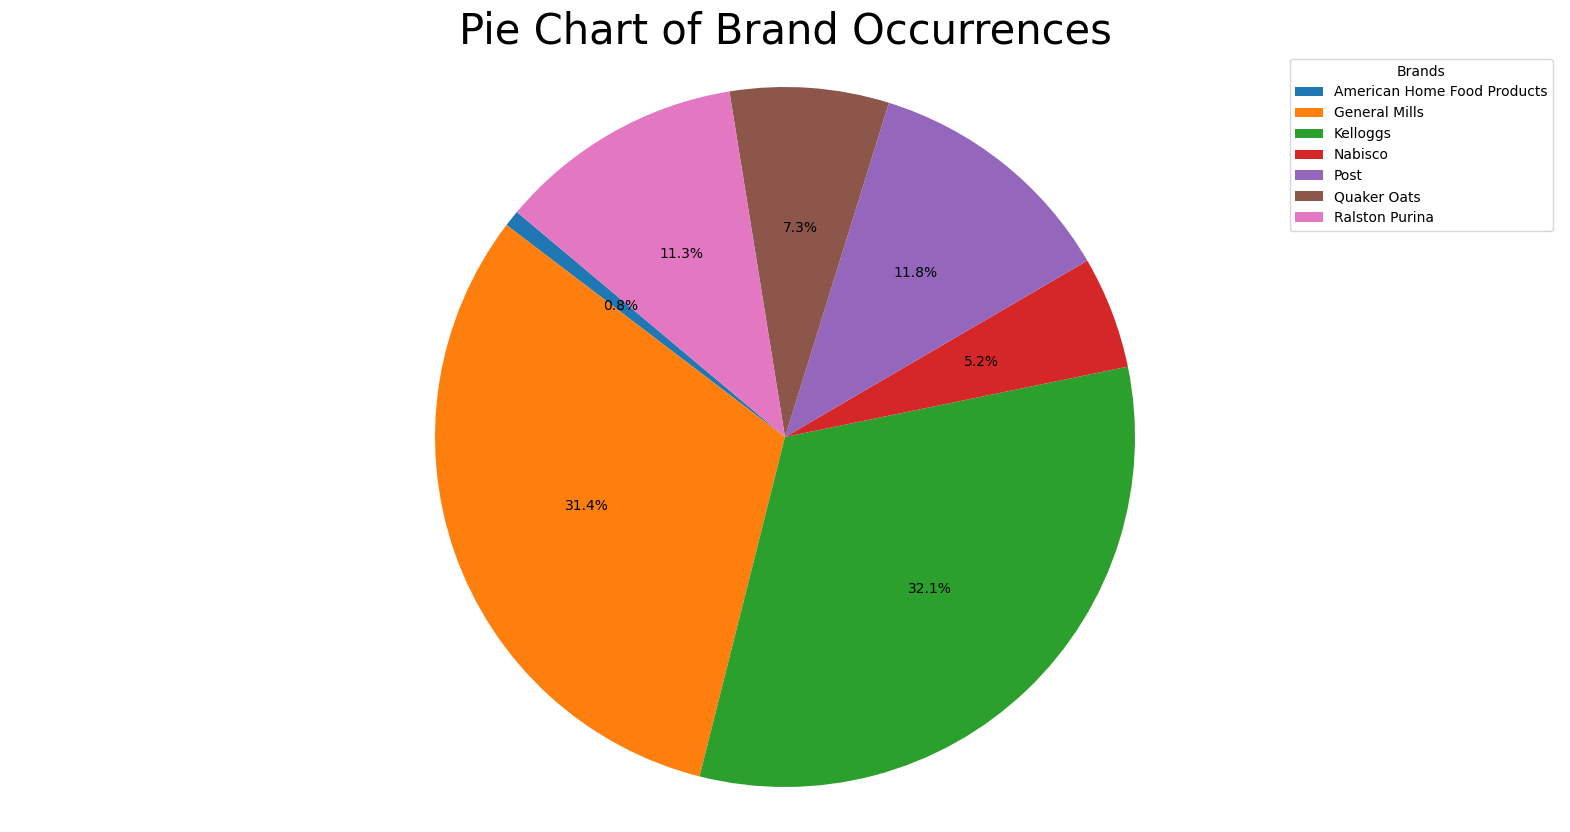

In [49]:
#Group the data by 'brand' and calculate the total ingredient_sum of each category
brand_counts = cereal['ingredient_sum'].groupby(cereal['brand']).sum()

# Create a pie chart
plt.figure(figsize=(20, 10))
wedges, texts, autotexts = plt.pie(brand_counts, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Pie Chart of Brand Occurrences', fontsize=30)


# Display the pie chart
plt.axis('equal')
plt.legend(brand_counts.index, title='Brands', loc='upper right')
plt.show()

Classification of Cereals based on nutritional content for a category of persons

In [50]:
cereal['category']= 'Adult'
cereal.loc[cereal['sugars']<=5,'category']='Children'
cereal.loc[cereal['calories']<=100,'category']='Baby'
cereal.loc[cereal['protein']>=5,'category']='Pregnant Women'

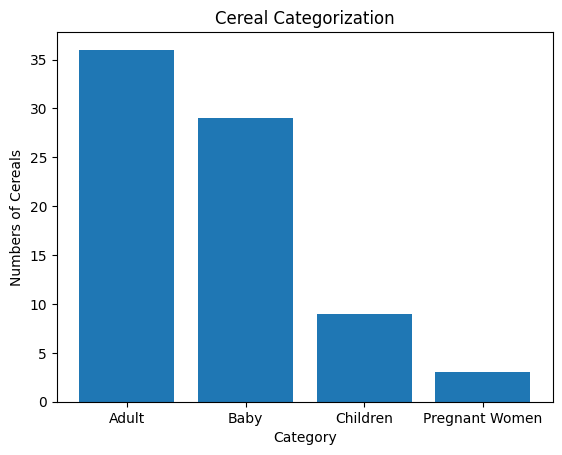

In [51]:
# counting the number of cereals in each category
category_counts=cereal['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Numbers of Cereals')
plt.title('Cereal Categorization')
plt.show()

In [52]:
baby_cereals=cereal[cereal['category']=='Baby']
print('Cereals Suitable For Babies:')
print(baby_cereals[['name','category']])

children_cereals=cereal[cereal['category']=='Children']
print('Cereals Suitable For Children:')
print(children_cereals[['name','category']])

adult_cereals=cereal[cereal['category']=='Adult']
print('Cereals Suitable For Adults:')
print(adult_cereals[['name','category']])

pregnant_women_cereals=cereal[cereal['category']=='Pregnant Women']
print('Cereals Suitable For Pregnant Women:')
print(pregnant_women_cereals[['name','category']])

Cereals Suitable For Babies:
                         name category
0                   100% Bran     Baby
2                    All-Bran     Baby
3   All-Bran with Extra Fiber     Baby
8                   Bran Chex     Baby
9                 Bran Flakes     Baby
16                Corn Flakes     Baby
20     Cream of Wheat (Quick)     Baby
22     Crispy Wheat & Raisins     Baby
23                Double Chex     Baby
26        Frosted Mini-Wheats     Baby
30               Golden Crisp     Baby
32          Grape Nuts Flakes     Baby
41                       Life     Baby
43                      Maypo     Baby
47       Multi-Grain Cheerios     Baby
50          Nutri-grain Wheat     Baby
53                 Product 19     Baby
54                Puffed Rice     Baby
55               Puffed Wheat     Baby
56         Quaker Oat Squares     Baby
59            Raisin Nut Bran     Baby
60             Raisin Squares     Baby
63             Shredded Wheat     Baby
64     Shredded Wheat 'n'Bran     B

In [53]:
pregnant_women_cereals.shape

(3, 19)

In [54]:
adult_cereals.shape

(36, 19)

In [55]:
category_counts

Adult             36
Baby              29
Children           9
Pregnant Women     3
Name: category, dtype: int64

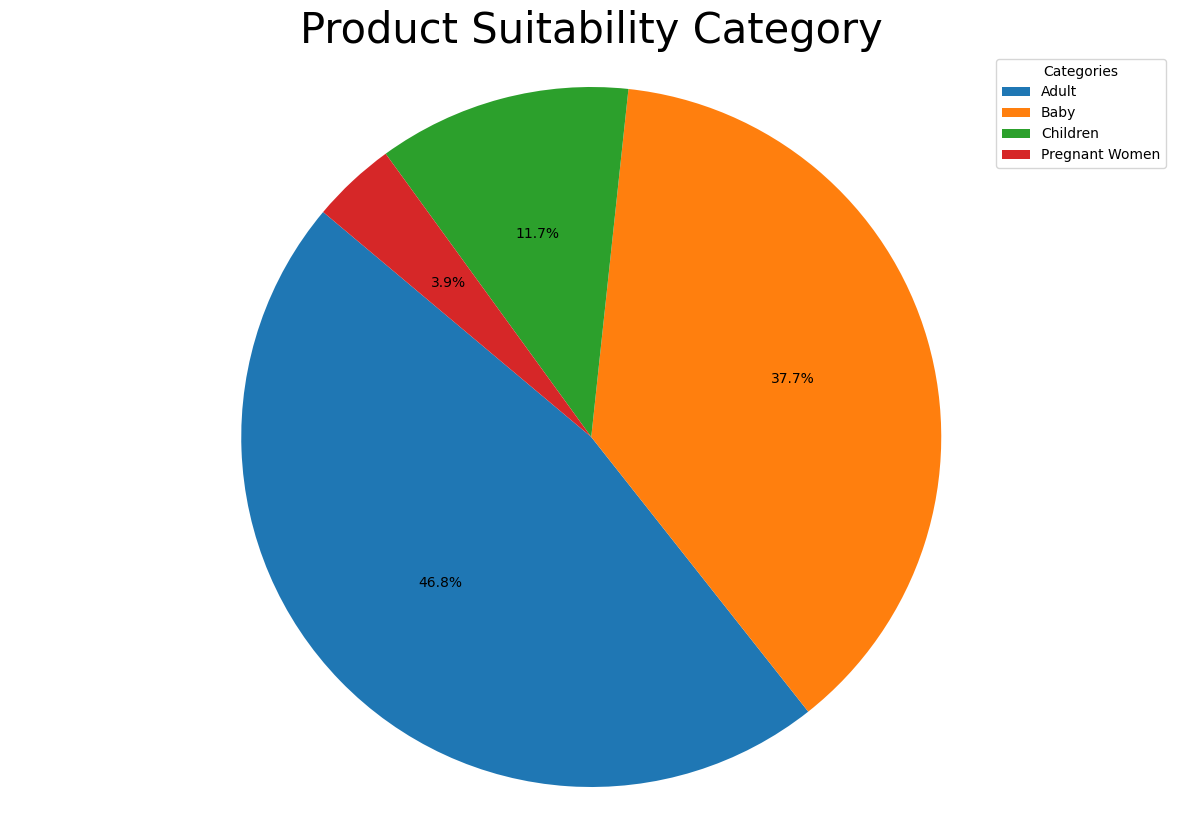

In [56]:
counts = cereal["category"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Product Suitability Category', fontsize=30)


# Display the pie chart
plt.axis('equal')
plt.legend(counts.index, title='Categories', loc='upper right')
plt.show()

In [62]:
#Classifying Cereals Based On Their Sugar and Fiber Content
high_sugar_threshold=9
low_fiber_threshold=3

cereal["Group"]= ""
cereal.loc[cereal['sugars']>high_sugar_threshold,'Group']='High Sugar(Diabetes Risk)'
cereal.loc[cereal['fiber']<low_fiber_threshold,'Group']='Low Fiber(Health Risk)'
cereal.loc[(cereal['sugars']<=high_sugar_threshold)&(cereal['fiber']>=low_fiber_threshold),'Group']='Moderate'

In [63]:
group_counts=cereal['Group'].value_counts()
print(group_counts)

Low Fiber(Health Risk)       50
Moderate                     19
High Sugar(Diabetes Risk)     8
Name: Group, dtype: int64


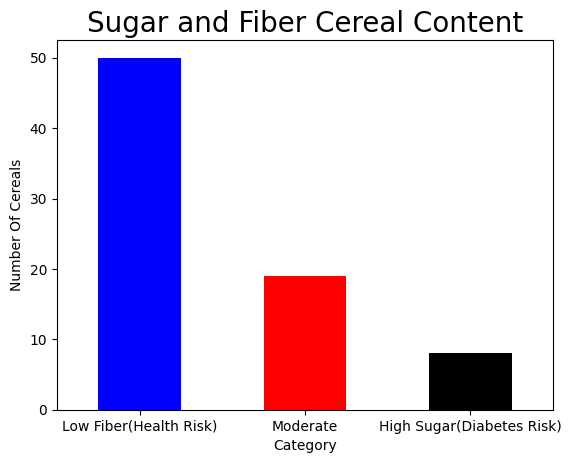

In [75]:
group_counts.plot(kind="bar", color=colors)
colors=["blue", "red", "black"]
plt.xlabel("Category", )
plt.ylabel("Number Of Cereals")
plt.xticks(rotation=0)
plt.title("Sugar and Fiber Cereal Content", fontsize=20)
plt.show()

In [76]:
moderate_cereals=cereal[cereal['Group']=='Moderate']
print(moderate_cereals[['name','Group']])

High_Risk_Diabetic_cereals=cereal[cereal['Group']=='High Sugar(Diabetes Risk)']
print(High_Risk_Diabetic_cereals[['name','Group']])

Low_Fibre_cereals=cereal[cereal['Group']=='Low Fiber(Health Risk)']
print(Low_Fibre_cereals[['name','Group']])


                         name     Group
0                   100% Bran  Moderate
2                    All-Bran  Moderate
3   All-Bran with Extra Fiber  Moderate
8                   Bran Chex  Moderate
9                 Bran Flakes  Moderate
19         Cracklin' Oat Bran  Moderate
26        Frosted Mini-Wheats  Moderate
32          Grape Nuts Flakes  Moderate
33                 Grape-Nuts  Moderate
34         Great Grains Pecan  Moderate
49  Nutri-Grain Almond-Raisin  Moderate
50          Nutri-grain Wheat  Moderate
63             Shredded Wheat  Moderate
64     Shredded Wheat 'n'Bran  Moderate
65  Shredded Wheat spoon size  Moderate
68    Strawberry Fruit Wheats  Moderate
71          Total Whole Grain  Moderate
74                 Wheat Chex  Moderate
75                   Wheaties  Moderate
                                      name                      Group
27  Fruit & Fibre Dates; Walnuts; and Oats  High Sugar(Diabetes Risk)
28                           Fruitful Bran  High Sugar(Diabe

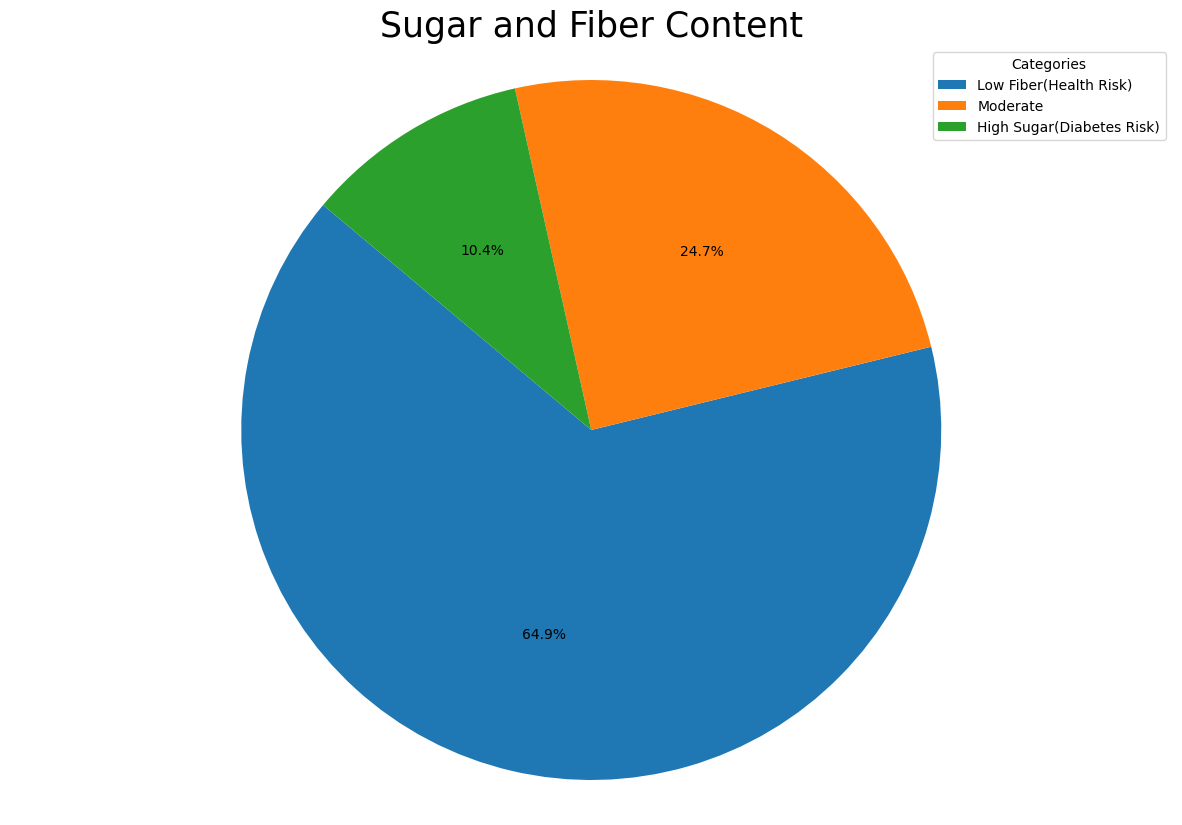

In [94]:
counts_sugarfiber = cereal["Group"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts_sugarfiber, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sugar and Fiber Content', fontsize=25)


# Display the pie chart
plt.axis('equal')
plt.legend(counts_sugarfiber.index, title='Categories', loc='upper right')
plt.show()

**Categorizing The Cereals As Cold Or Hot Cereal Types**

In [82]:
cold_cereals=cereal.loc[cereal['type']=='C']
cereal.loc[cereal['type']=='H']
if len(group)>0:
    for cereal_name in group['name']:
        print(group['name'].to_string(index=False))
        print(cereal_name)


NameError: ignored

**Categorizing Cereals Based On Their Ratings**

In [97]:
#Defining Rating Range
excellent_range=(81,100)
better_range=(61,80)
good_range=(41,60)
average_range=(21,40)
below_average_range=(0,20)

In [98]:
#creating a new column for rating categories
cereal['Rating Category']='Not Specified'


In [99]:
#categorizing cerals based ontheir ratings
cereal.loc[cereal['rating'].between(*excellent_range),'Rating Category']='Excellent'
cereal.loc[cereal['rating'].between(*better_range),'Rating Category']='Good'
cereal.loc[cereal['rating'].between(*good_range),'Rating Category']='Better'
cereal.loc[cereal['rating'].between(*average_range),'Rating Category']='Average'
cereal.loc[cereal['rating'].between(*below_average_range),'Rating Category']='Below Average'

In [100]:
excellent_cereals=cereal[cereal['Rating Category']=='Excellent']
better_cereals=cereal[cereal['Rating Category']=='Better']
good_cereals=cereal[cereal['Rating Category']=='Good']
average_cereals=cereal[cereal['Rating Category']=='Average']
below_average_cereals=cereal[cereal['Rating Category']=='Below Average']

In [101]:
print('Excellent Cereals:')
print(excellent_cereals[['name','rating']])

print('\nGood Cereals:')
print(good_cereals[['name','rating']])

print('\nBetter Cereals:')
print(better_cereals[['name','rating']])


print('\nAverage Cereals:')
print(average_cereals[['name','rating']])

print('\nBelow Average  Cereals:')
print(below_average_cereals[['name','rating']])

Excellent Cereals:
                        name     rating
3  All-Bran with Extra Fiber  93.704912

Good Cereals:
                         name     rating
0                   100% Bran  68.402973
20     Cream of Wheat (Quick)  64.533816
55               Puffed Wheat  63.005645
63             Shredded Wheat  68.235885
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787

Better Cereals:
                       name     rating
2                  All-Bran  59.425505
8                 Bran Chex  49.120253
9               Bran Flakes  53.313813
11                 Cheerios  50.764999
15                Corn Chex  41.445019
16              Corn Flakes  45.863324
21                  Crispix  46.895644
23              Double Chex  44.330856
26      Frosted Mini-Wheats  58.345141
28            Fruitful Bran  41.015492
32        Grape Nuts Flakes  52.076897
33               Grape-Nuts  53.371007
34       Great Grains Pecan  45.811716
41                     Life  45.3280

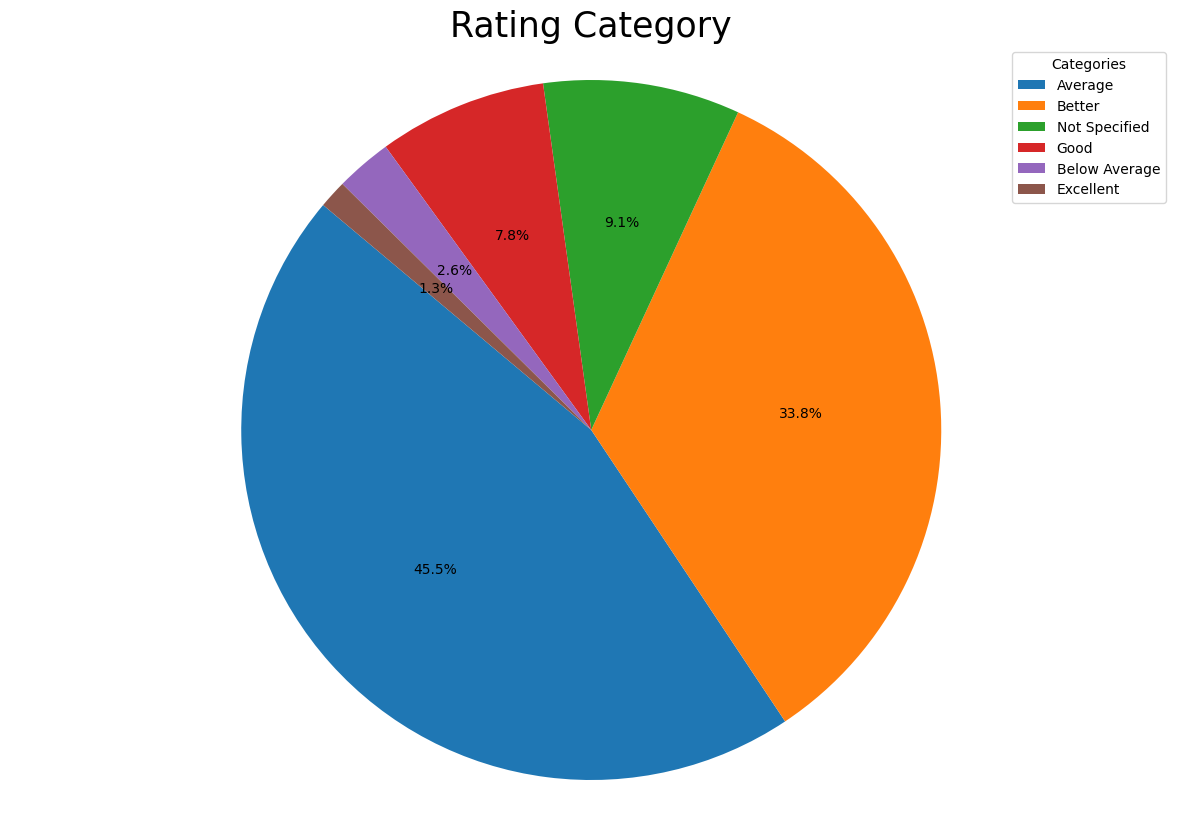

In [102]:
counts_ratingc = cereal["Rating Category"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts_ratingc, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Rating Category', fontsize=25)


# Display the pie chart
plt.axis('equal')
plt.legend(counts_ratingc.index, title='Categories', loc='upper right')
plt.show()